In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
l1 = pd.read_csv('../../PREPROCESSING/very_clean_data/one_left.csv',
                 index_col=0, parse_dates=['시각'], infer_datetime_format=True)
r1 = pd.read_csv('../../PREPROCESSING/very_clean_data/one_right.csv',
                 index_col=0, parse_dates=['시각'], infer_datetime_format=True)
l2 = pd.read_csv('../../PREPROCESSING/very_clean_data/two_left.csv',
                 index_col=0, parse_dates=['시각'], infer_datetime_format=True)
r2 = pd.read_csv('../../PREPROCESSING/very_clean_data/two_right.csv',
                 index_col=0, parse_dates=['시각'], infer_datetime_format=True)

In [77]:
# 지수이동평균으로 상한 하한을 구하는 함수 만들기
def MA(df, n):
    ewm = df.ewm(span=n).mean()
    std = df.ewm(span=n).std()
    upper = ewm + 3*std
    lower = ewm - 3*std
    columns = df.columns.drop('시각')
    upper.columns = columns + '_upper'
    lower.columns = columns + '_lower'
    temp = pd.concat([l1, upper], axis=1)
    temp = pd.concat([temp, lower], axis=1)
    
    return temp

In [93]:
# 10개를 기준으로 잡기
l1_n = MA(l1, 20)
r1_n = MA(r1, 20)
l2_n = MA(l2, 20)
r2_n = MA(r2, 20)

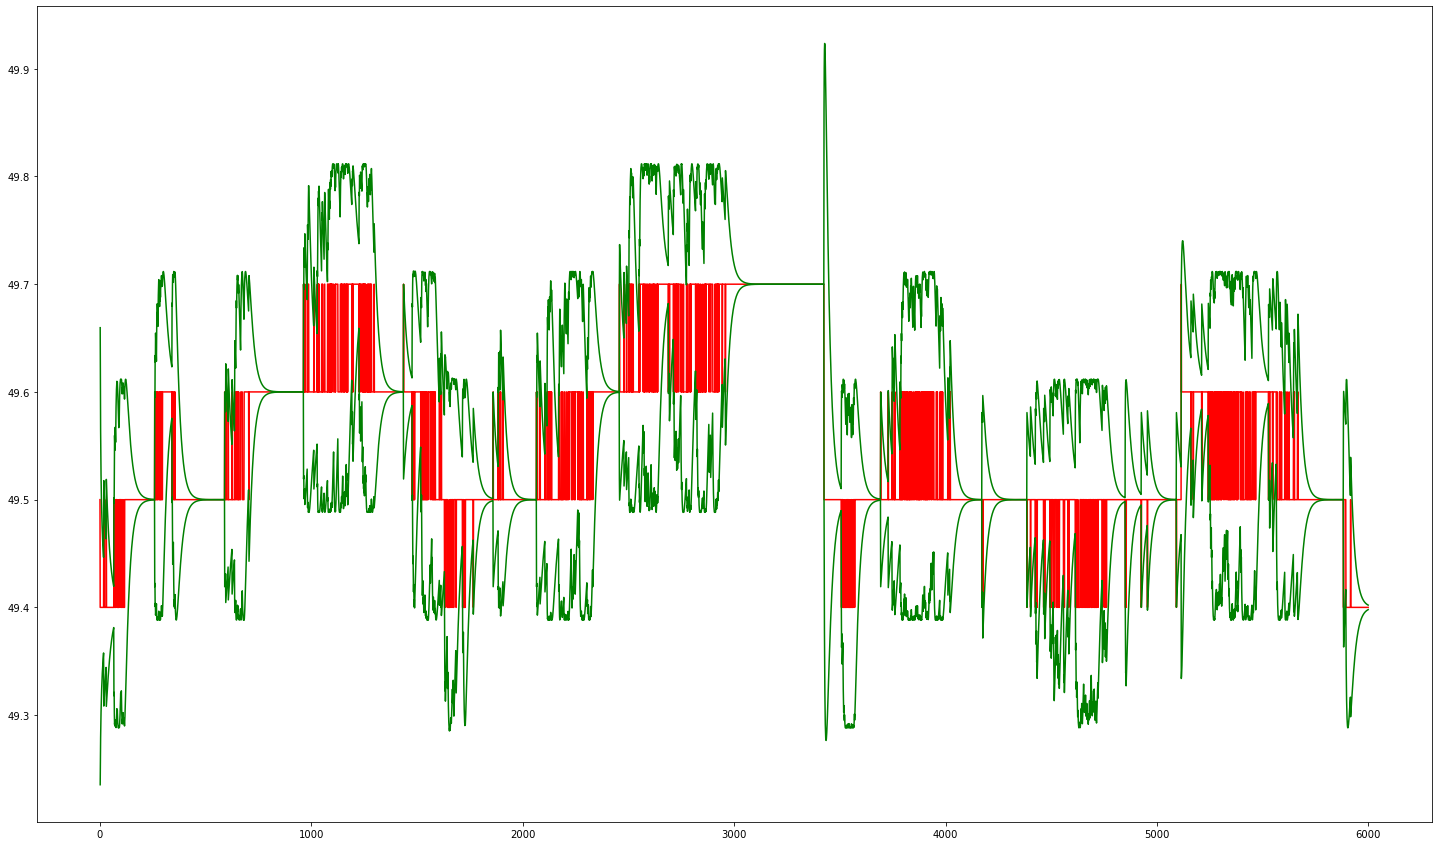

In [110]:
# example
plt.figure(figsize=(25,15))
plt.plot(l1_n['전압'][:6000], 'red', l1_n['전압_upper'][:6000], 'green' , l1_n['전압_lower'][:6000], 'green')